In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-07 17:22:43.898260: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 17:22:43.900365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 17:22:43.940877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 17:22:43.941788: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 17:22:44.546725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
os.getcwd()

'/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/histology_slides/breast'

In [3]:
os.chdir('/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/histology_slides/breast')

In [2]:
fold_df = pd.read_csv("Folds.csv")

In [3]:
img_path = "./BreaKHis_v1/"
classes = ["benign","malign"]

In [4]:
fold_df = fold_df.rename(columns={'filename':'path'})
fold_df.head(3)

,fold,mag,grp,path
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [7]:
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

In [5]:
#Extracting the filename and label from the path column
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [6]:
fold_df.head(3)

,fold,mag,grp,path,filename,label
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign


In [10]:
os.getcwd()

'/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/histology_slides/breast'

In [11]:
for i, src in enumerate(fold_df['path']):
    print(i, '\t', src)
    if i ==5:
        break

0 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png
1 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png
2 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png
3 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png
4 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png
5 	 BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png


In [8]:
os.chdir('/usr/local/home/sgchr/Documents/GDN/Check/')

In [13]:
#Moving all the images to one folder
# for src in fold_df['path']:
#     # src = "BreaKHis_v1/" + p
#     dest = "/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/histology_slides/Cancer"
#     #saving the files with its corresponding class and patient_id
#     dest = os.path.join(dest,src.split("/")[7]+ "_" + src.split("/")[-1])
#     shutil.copyfile(src,dest)

In [14]:
os.chdir('/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/')

In [6]:
#Creating a new data frame with labels and file names stored in single folder
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']
#Encoding the class to integer
fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)

In [7]:
fold_df.head(3)

,fold,mag,grp,path,filename,label,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,benign_SOB_B_A-14-22549AB-100-003.png,0


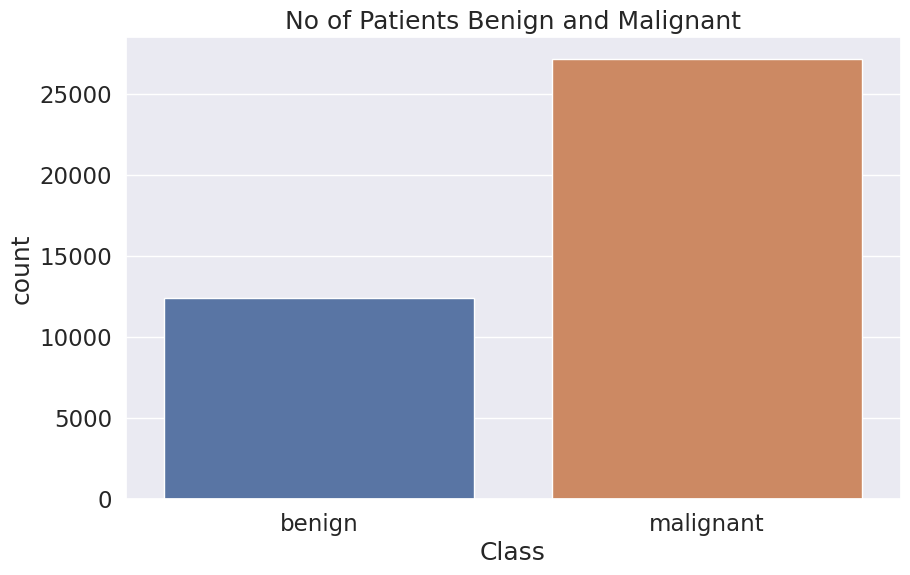

In [9]:
#Lets explore the data set
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(x = 'label', data = fold_df)
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

In [8]:
#Filtering the data frame to benign and malignant for visualization
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

In [20]:
os.getcwd()

'/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1'

In [21]:
# #Plotting the benign samples
# plt.figure(figsize = (30,10))
# for i in range(0,40):
#     plt.subplot(4,10,i+1)
#     img = cv2.imread("../Cancer/"+ benign_df['file_loc'][i],1)
#     # plt.imshow(img)

In [9]:
df = pd.DataFrame(os.listdir('/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer'))

In [10]:
df.head(3)

,0
0,100X_SOB_M_DC-14-9461-100-009.png
1,400X_SOB_B_F-14-23222AB-400-018.png
2,100X_SOB_M_MC-14-12773-100-001.png


In [11]:
# df = pd.DataFrame(os.listdir('Cancer'))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[2])
df['class'] = df['label'].apply(lambda x: 0 if x =='B' else 1)
df.set_index("file_loc",inplace=True)

In [18]:
df.index.values

array(['100X_SOB_M_DC-14-9461-100-009.png',
       '400X_SOB_B_F-14-23222AB-400-018.png',
       '100X_SOB_M_MC-14-12773-100-001.png', ...,
       '40X_SOB_B_F-14-9133-40-007.png',
       '400X_SOB_M_DC-14-4364-400-004.png',
       '100X_SOB_B_PT-14-21998AB-100-031.png'], dtype=object)

In [25]:
df.head(3)

,label,class
file_loc,,
100X_SOB_M_DC-14-9461-100-009.png,M,1
400X_SOB_B_F-14-23222AB-400-018.png,B,0
100X_SOB_M_MC-14-12773-100-001.png,M,1


In [12]:
#Performing the splitting
data_train_and_val, data_test = train_test_split(df, test_size = 0.1, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.1, random_state = 47)

In [13]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6406, 2)
Validation size : (712, 2)
Testing size : (791, 2)


In [16]:
data_train.head(3)

,label,class
file_loc,,
40X_SOB_B_F-14-14134-40-021.png,B,0
100X_SOB_M_DC-14-2523-100-024.png,M,1
100X_SOB_B_TA-14-16184-100-009.png,B,0


In [34]:
from PIL import Image
import os
import cv2
folder_path_benign = '/usr/local/home/sgchr/Documents/Cancer_classification/BreaKHis_v1/Cancer_test/benign'
image_files_benign = [os.path.join(folder_path_benign, filename) for filename in os.listdir(folder_path_benign)]

folder_path_mal = '/usr/local/home/sgchr/Documents/Cancer_classification/BreaKHis_v1/Cancer_test/malignant'
image_files_mal = [os.path.join(folder_path_mal, filename) for filename in os.listdir(folder_path_mal)]

X_te = []
common_size = (128, 128)

for image_file in image_files_benign:
    img = cv2.imread(image_file)
    if img is not None:
        # Resize the image to the common size
        img = cv2.resize(img, common_size)
        X_te.append(img)
    else:
        print(f"Error loading image: {image_file}")

for image_file in image_files_mal:
    img = cv2.imread(image_file)
    if img is not None:
        # Resize the image to the common size
        img = cv2.resize(img, common_size)
        X_te.append(img)
    else:
        print(f"Error loading image: {image_file}")
X_te = np.array(X_te)


In [27]:
X_te[3].shape

(128, 128, 3)

In [14]:
import torch
Y_tr = torch.tensor(data_train['class'].values)

/usr/local/home/sgchr/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:

# Y_tr = np.array(data_train['class'].values)
# print(Y_tr)


[1 1 1 ... 0 0 0]


In [55]:
data_test.columns

Index(['label', 'class'], dtype='object')

In [56]:
data_test.head(3)

,label,class
file_loc,,
40X_SOB_M_PC-14-12465-40-005.png,M,1
100X_SOB_B_TA-14-16184CD-100-023.png,B,0
400X_SOB_M_DC-14-13993-400-021.png,M,1


In [30]:
Y_te = np.array(data_test['class'].values)

In [31]:
data_train.columns

Index(['label', 'class'], dtype='object')

In [38]:
Y_tr = np.array(data_train['class'].values)

In [39]:
Y_te = np.array(data_test['class'].values)

In [22]:
data_train['label']

file_loc
40X_SOB_B_F-14-14134-40-021.png         B
100X_SOB_M_DC-14-2523-100-024.png       M
100X_SOB_B_TA-14-16184-100-009.png      B
400X_SOB_M_DC-14-11951-400-013.png      M
400X_SOB_M_DC-14-5695-400-010.png       M
                                       ..
40X_SOB_M_PC-14-15704-40-030.png        M
40X_SOB_M_MC-14-16456-40-008.png        M
40X_SOB_B_PT-14-22704-40-030.png        B
100X_SOB_B_PT-14-22704-100-002.png      B
100X_SOB_B_PT-14-21998AB-100-018.png    B
Name: label, Length: 6406, dtype: object

In [21]:
data_train['class']

file_loc
40X_SOB_B_F-14-14134-40-021.png         0
100X_SOB_M_DC-14-2523-100-024.png       1
100X_SOB_B_TA-14-16184-100-009.png      0
400X_SOB_M_DC-14-11951-400-013.png      1
400X_SOB_M_DC-14-5695-400-010.png       1
                                       ..
40X_SOB_M_PC-14-15704-40-030.png        1
40X_SOB_M_MC-14-16456-40-008.png        1
40X_SOB_B_PT-14-22704-40-030.png        0
100X_SOB_B_PT-14-22704-100-002.png      0
100X_SOB_B_PT-14-21998AB-100-018.png    0
Name: class, Length: 6406, dtype: int64

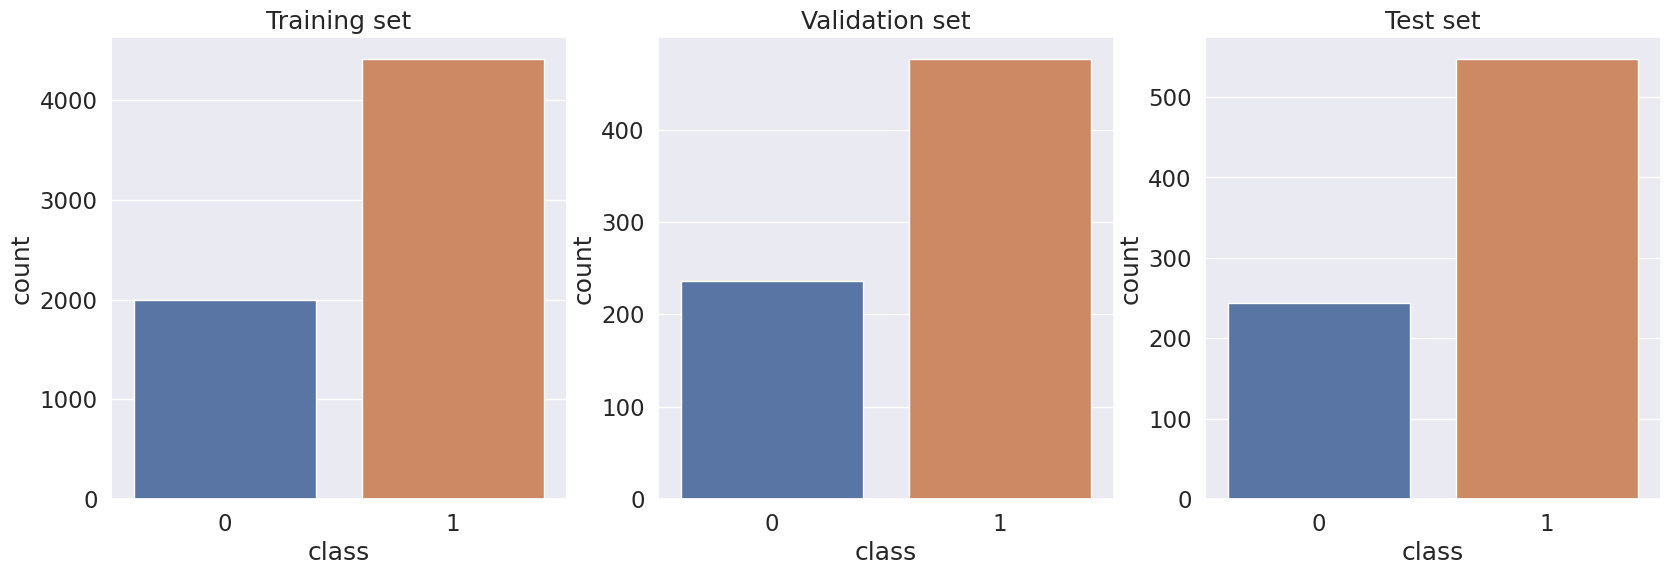

In [23]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(x = 'class', data = data_train)
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(x = 'class', data = data_val)
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(x = 'class', data = data_test)
plt.title("Test set");

In [30]:
#Separating the benign and malignant patients from train data
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

In [31]:
#Upsampling the minority class by the size of majority class with replacement
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), 
                                     random_state = 47, replace = True)

In [32]:
data_train = pd.concat([train_has_cancer,train_has_no_cancer_upsample])

In [36]:
data_train['label']

file_loc
100X_SOB_M_DC-14-2523-100-024.png       M
400X_SOB_M_DC-14-11951-400-013.png      M
400X_SOB_M_DC-14-5695-400-010.png       M
100X_SOB_M_DC-14-2980-100-024.png       M
40X_SOB_M_DC-14-13993-40-026.png        M
                                       ..
400X_SOB_B_PT-14-21998AB-400-028.png    B
200X_SOB_B_F-14-25197-200-055.png       B
400X_SOB_B_A-14-22549CD-400-002.png     B
40X_SOB_B_A-14-22549CD-40-016.png       B
40X_SOB_B_F-14-14134-40-002.png         B
Name: label, Length: 8812, dtype: object

In [33]:
data_train.head(3)

,label,class
file_loc,,
100X_SOB_M_DC-14-2523-100-024.png,M,1
400X_SOB_M_DC-14-11951-400-013.png,M,1
400X_SOB_M_DC-14-5695-400-010.png,M,1


In [2]:
import os
import cv2
folder_path_benign = '/usr/local/home/sgchr/Documents/Cancer_classification/BreaKHis_v1/Cancer_train/benign'
image_files_benign = [os.path.join(folder_path_benign, filename) for filename in os.listdir(folder_path_benign)]

folder_path_mal = '/usr/local/home/sgchr/Documents/Cancer_classification/BreaKHis_v1/Cancer_train/malignant'
image_files_mal = [os.path.join(folder_path_mal, filename) for filename in os.listdir(folder_path_mal)]

X_tr = []
# common_size = (128, 128)

for num, image_file in enumerate(image_files_benign):
    img = cv2.imread(image_file)
    if img is not None:
        # Resize the image to the common size
        # img = cv2.resize(img, common_size)
        X_tr.append(img)
        break
    else:
        print(f"Error loading image: {image_file}")

# for image_file in image_files_mal:
#     img = cv2.imread(image_file)
#     if img is not None:
#         # Resize the image to the common size
#         img = cv2.resize(img, common_size)
#         X_tr.append(img)
#     else:
#         print(f"Error loading image: {image_file}")



In [4]:
common_size = (128,128)
img_2 = cv2.resize(img, common_size)

In [3]:
X_tr = np.array(X_tr)
X_tr.shape

AttributeError: 'list' object has no attribute 'shape'

In [36]:
X_tr.shape

(8812, 128, 128, 3)

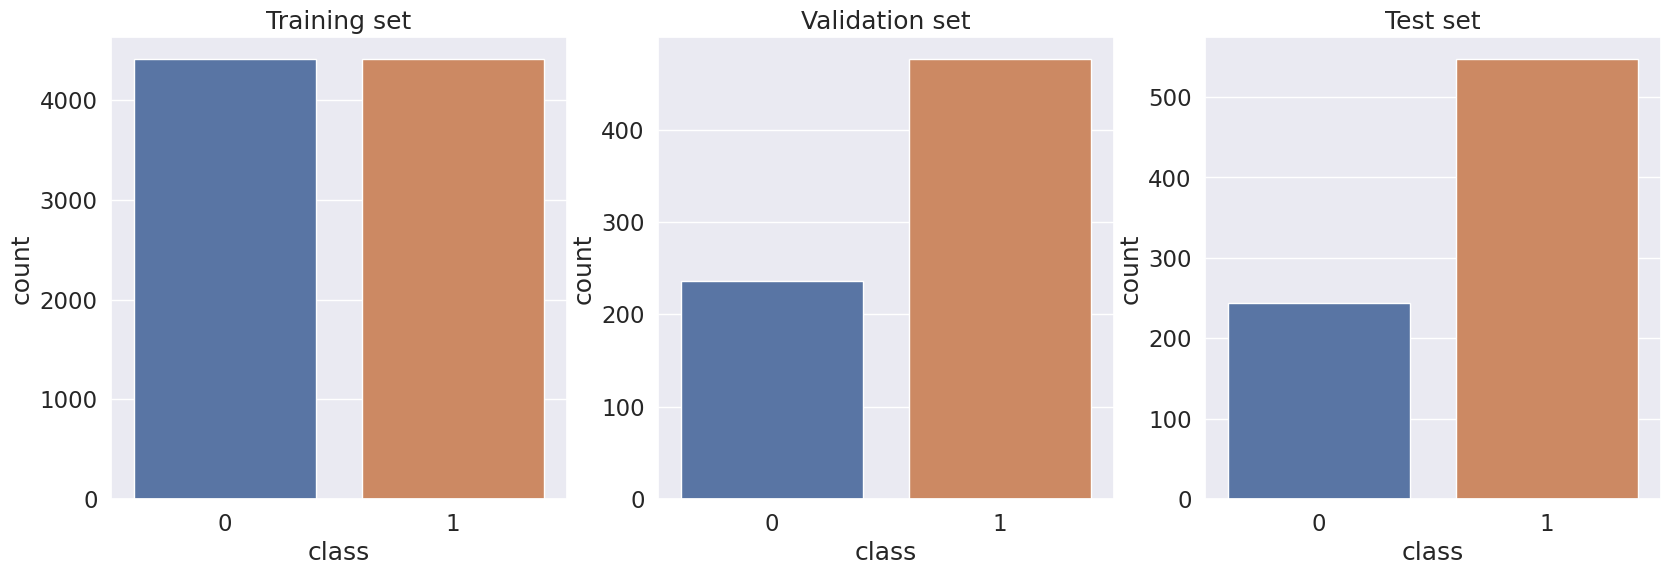

In [28]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(x = 'class', data = data_train)
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(x = 'class', data = data_val)
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(x = 'class', data = data_test)
plt.title("Test set");

In [39]:
!pwd

/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1


In [40]:
#Creating the directories to store images
# os.makedirs("../Cancer_train")
# os.makedirs("../Cancer_test")
# os.makedirs("../Cancer_validation")
# os.makedirs("../Cancer_train/benign")
# os.makedirs("../Cancer_train/malignant")
# os.makedirs("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation/benign")
# os.makedirs("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation/malignant")
# os.makedirs("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/benign")
# os.makedirs("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/malignant")

In [29]:
data_train.head(3)

,label,class
file_loc,,
100X_SOB_M_DC-14-2523-100-024.png,M,1
400X_SOB_M_DC-14-11951-400-013.png,M,1
400X_SOB_M_DC-14-5695-400-010.png,M,1


In [42]:
for i in data_train:
    print(i)

label
class


In [43]:
!pwd


/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1


In [44]:
# import os
# import shutil

# # Training data
# i = 1
# for img in data_train.index:
#     if img != ".DS_Store":
#         target = df.loc[img, 'class']
#         if target == 1:
#             label = 'malignant'
#         else:
#             label = 'benign'

#         src = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer", img)
#         dest = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_train/", label, "image" + str(i) + ".png")

#         # Copy the image using shutil
#         shutil.copy(src, dest)
#         i = i + 1


In [45]:
# # Validation data
# i = 1
# for img in data_val.index:
#     if img != ".DS_Store":
#         target = df.loc[img, 'class']
#         if target == 1:
#             label = 'malignant'
#         else:
#             label = 'benign'

#         src = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer", img)
#         dest = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation/", label, "image" + str(i) + ".png")

#         # Copy the image using shutil
#         shutil.copy(src, dest)
#         i = i + 1


In [46]:
# # Test data
# i = 1
# for img in data_test.index:
#     if img != ".DS_Store":
#         target = df.loc[img, 'class']
#         if target == 1:
#             label = 'malignant'
#         else:
#             label = 'benign'

#         src = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer", img)
#         dest = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/", label, "image" + str(i) + ".png")

#         # Copy the image using shutil
#         shutil.copy(src, dest)
#         i = i + 1

In [47]:
!pwd

/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1


In [30]:
#Checking their lengths
print("Training Data:")
print(" ")
print("Benign:",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_train/benign")))
print("Malignant::",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_train/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size:",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation/benign")))
print("Malignant size :",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size :",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/malignant")))

Training Data:
 
Benign: 4406
Malignant:: 4406
 
Validation Data
 
Benign size: 236
Malignant size : 476
 
Testing Data:
 
Benign size : 244
Malignant size : 547


In [49]:
#Defining Image Data Generator
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

In [50]:
#Setting up the images for image data generator
train_generation = datagen.flow_from_directory("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_train",target_size=(128,128),batch_size = 32, class_mode="binary")
val_generation = datagen.flow_from_directory("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_validation", target_size=(128,128), batch_size=32, class_mode="binary")

Found 8812 images belonging to 2 classes.
Found 712 images belonging to 2 classes.


In [31]:
cancer_model = Sequential()

#First Layer
cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128,128,3), activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.4))

#Fourth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.2))

#Flattening the layers
cancer_model.add(Flatten())
#Adding the dense layer
cancer_model.add(Dense(256, activation = 'relu'))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(1, activation = 'sigmoid'))

cancer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 128)       0

2023-11-07 10:28:38.966981: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [32]:
#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [33]:

#Compiling the model
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=5)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [54]:
#Model is fitted using train and validation generator for 200 epochs
history = cancer_model.fit(train_generation, validation_data=val_generation, epochs=200 ,
                 callbacks=[early_stop,checkpoint], verbose = 1)

Epoch 1/200
276/276 [==============================] - ETA: 0s - loss: 0.5472 - accuracy: 0.7320INFO:tensorflow:Assets written to: ./Best_model/assets


INFO:tensorflow:Assets written to: ./Best_model/assets


276/276 [==============================] - 117s 422ms/step - loss: 0.5472 - accuracy: 0.7320 - val_loss: 0.4752 - val_accuracy: 0.8174
Epoch 2/200
276/276 [==============================] - ETA: 0s - loss: 0.4680 - accuracy: 0.8058INFO:tensorflow:Assets written to: ./Best_model/assets


INFO:tensorflow:Assets written to: ./Best_model/assets


276/276 [==============================] - 111s 402ms/step - loss: 0.4680 - accuracy: 0.8058 - val_loss: 0.4518 - val_accuracy: 0.8329
Epoch 3/200
276/276 [==============================] - 115s 417ms/step - loss: 0.4396 - accuracy: 0.8172 - val_loss: 0.4831 - val_accuracy: 0.8006
Epoch 4/200
276/276 [==============================] - ETA: 0s - loss: 0.4006 - accuracy: 0.8348INFO:tensorflow:Assets written to: ./Best_model/assets


INFO:tensorflow:Assets written to: ./Best_model/assets


276/276 [==============================] - 113s 409ms/step - loss: 0.4006 - accuracy: 0.8348 - val_loss: 0.4368 - val_accuracy: 0.8258
Epoch 5/200
 79/276 [=======>......................] - ETA: 1:14 - loss: 0.4054 - accuracy: 0.8236

KeyboardInterrupt: 

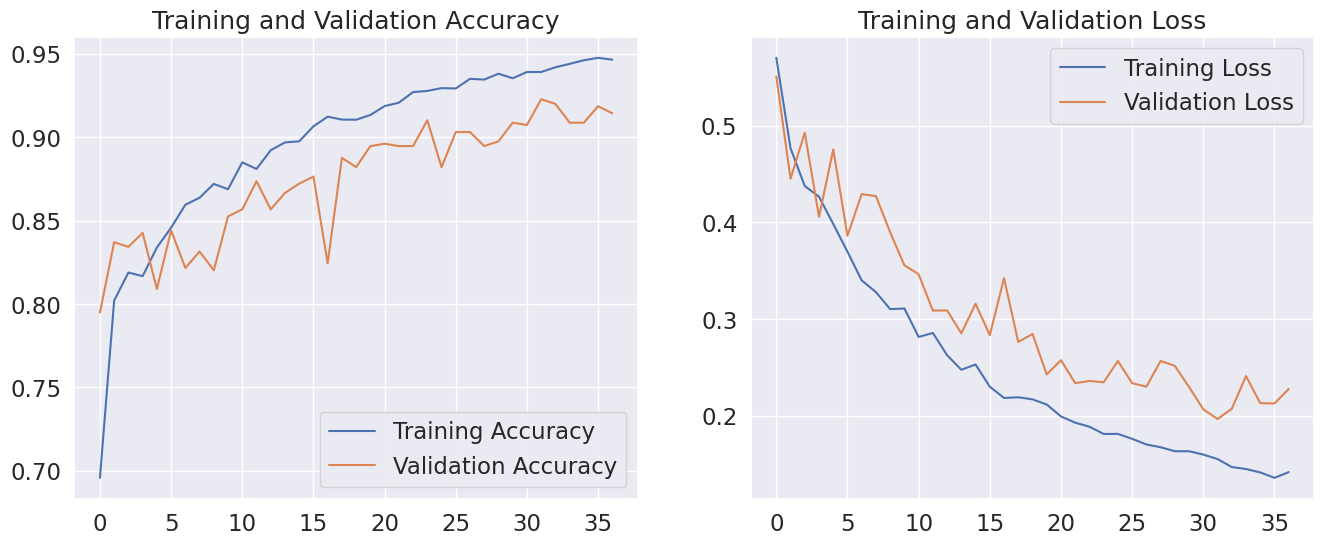

In [ ]:
#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
#Loading the test data using Image Data Generator
test_gen = datagen.flow_from_directory("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test", target_size=(128,128), class_mode="binary", batch_size=1, shuffle=False)

Found 791 images belonging to 2 classes.


In [ ]:
pred = cancer_model.evaluate(test_gen)

791/791 [==============================] - 18s 22ms/step - loss: 0.2147 - accuracy: 0.9115


In [ ]:
data_test.head(3)

,label,class
file_loc,,
40X_SOB_M_PC-14-12465-40-005.png,M,1
100X_SOB_B_TA-14-16184CD-100-023.png,B,0
400X_SOB_M_DC-14-13993-400-021.png,M,1


In [ ]:

import os
import random
import shutil
from PIL import Image
import numpy as np
#Array to hold Input Images and their labels
test = []
labels = []

#Loading random 10 images
random_images = np.random.choice(data_test.index,10)

# Destination directory for saving images
destination_directory = "/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/histology_slides/breast/Testing_Destination"

for i in random_images:
    # Finding the class label
    label = data_test.loc[i, "class"]
    labels.append(label)

    # Determining the class directory
    if label == 1:
        lab = "malignant"
    else:
        lab = "benign"

    # Creating source and destination paths
    source_path = os.path.join("/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test", lab, i)
    destination_path = os.path.join(destination_directory, lab, i)

    # Moving the image using shutil
    os.makedirs(os.path.join(destination_directory, lab), exist_ok=True)
    shutil.move(source_path, destination_path)

    # Opening and resizing the image using Pillow
    img = Image.open(destination_path)
    img = img.resize((128, 128))

    # Converting PIL image to numpy array and appending to the 'test' list
    img_array = np.array(img)
    test.append(img_array)
 
print("Images moved and appended to the 'test' list.")





FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/home/sgchr/Documents/GDN/Check/BreaKHis_v1/Cancer_test/malignant/400X_SOB_M_PC-14-19440-400-026.png'